## Autism Prediction Using ML

In [1]:
#importing all the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset 
df = pd.read_csv("autism.csv")

In [3]:
#first 5 rows 
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [4]:
#size of the dataset
df.shape

(800, 22)

In [5]:
#summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [6]:
#statistical measures
df.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [7]:
#Data Cleaning 

In [8]:
df['ethnicity'].value_counts()

White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: ethnicity, dtype: int64

In [9]:
df['relation'].value_counts()

Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: relation, dtype: int64

In [10]:
df['jaundice'].value_counts()

no     615
yes    185
Name: jaundice, dtype: int64

In [11]:
#converting ‘yes’ and ‘no’ to 0 and 1 and ‘?’, ‘others’, and ‘Others’ to 'others'
df = df.replace({'yes':'1', 'no':'0', '?':'others', 'Others':'others'})

In [12]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,others,0,0,Austria,0,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,others,0,0,India,0,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,0,1,United States,0,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,others,0,0,United States,0,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,others,0,0,South Africa,0,-4.777286,18 and more,Self,0


([<matplotlib.patches.Wedge at 0x171068eb310>,
 [Text(-0.887372754414888, 0.6500535321972606, '0'),
  Text(0.8873727239836849, -0.6500535737381766, '1')],
 [Text(-0.4840215024081207, 0.35457465392577847, '79.9%'),
  Text(0.4840214858092826, -0.3545746765844599, '20.1%')])

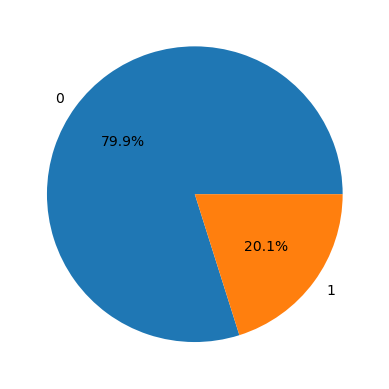

In [13]:
#Exploratory Data Analysis
plt.pie(df['Class/ASD'].value_counts().values, labels = df['Class/ASD'].value_counts().index, autopct='%1.1f%%')

In [ ]:
# From the piechart above, we get to know that the dataset is highly imbalanced.

In [14]:
#segregating columns based on their datatype
ints = []
objects = []
floats = []
 
for col in df.columns:
  if df[col].dtype == float:
    floats.append(col)
  elif df[col].dtype == object:
    objects.append(col)
  else:
    ints.append(col)

In [15]:
print(ints)
print(floats)
print(objects)

['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Class/ASD']
['age', 'result']
['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']


In [16]:
ints.remove('ID')

In [17]:
ints.remove('Class/ASD')

In [18]:
ints

['A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score']

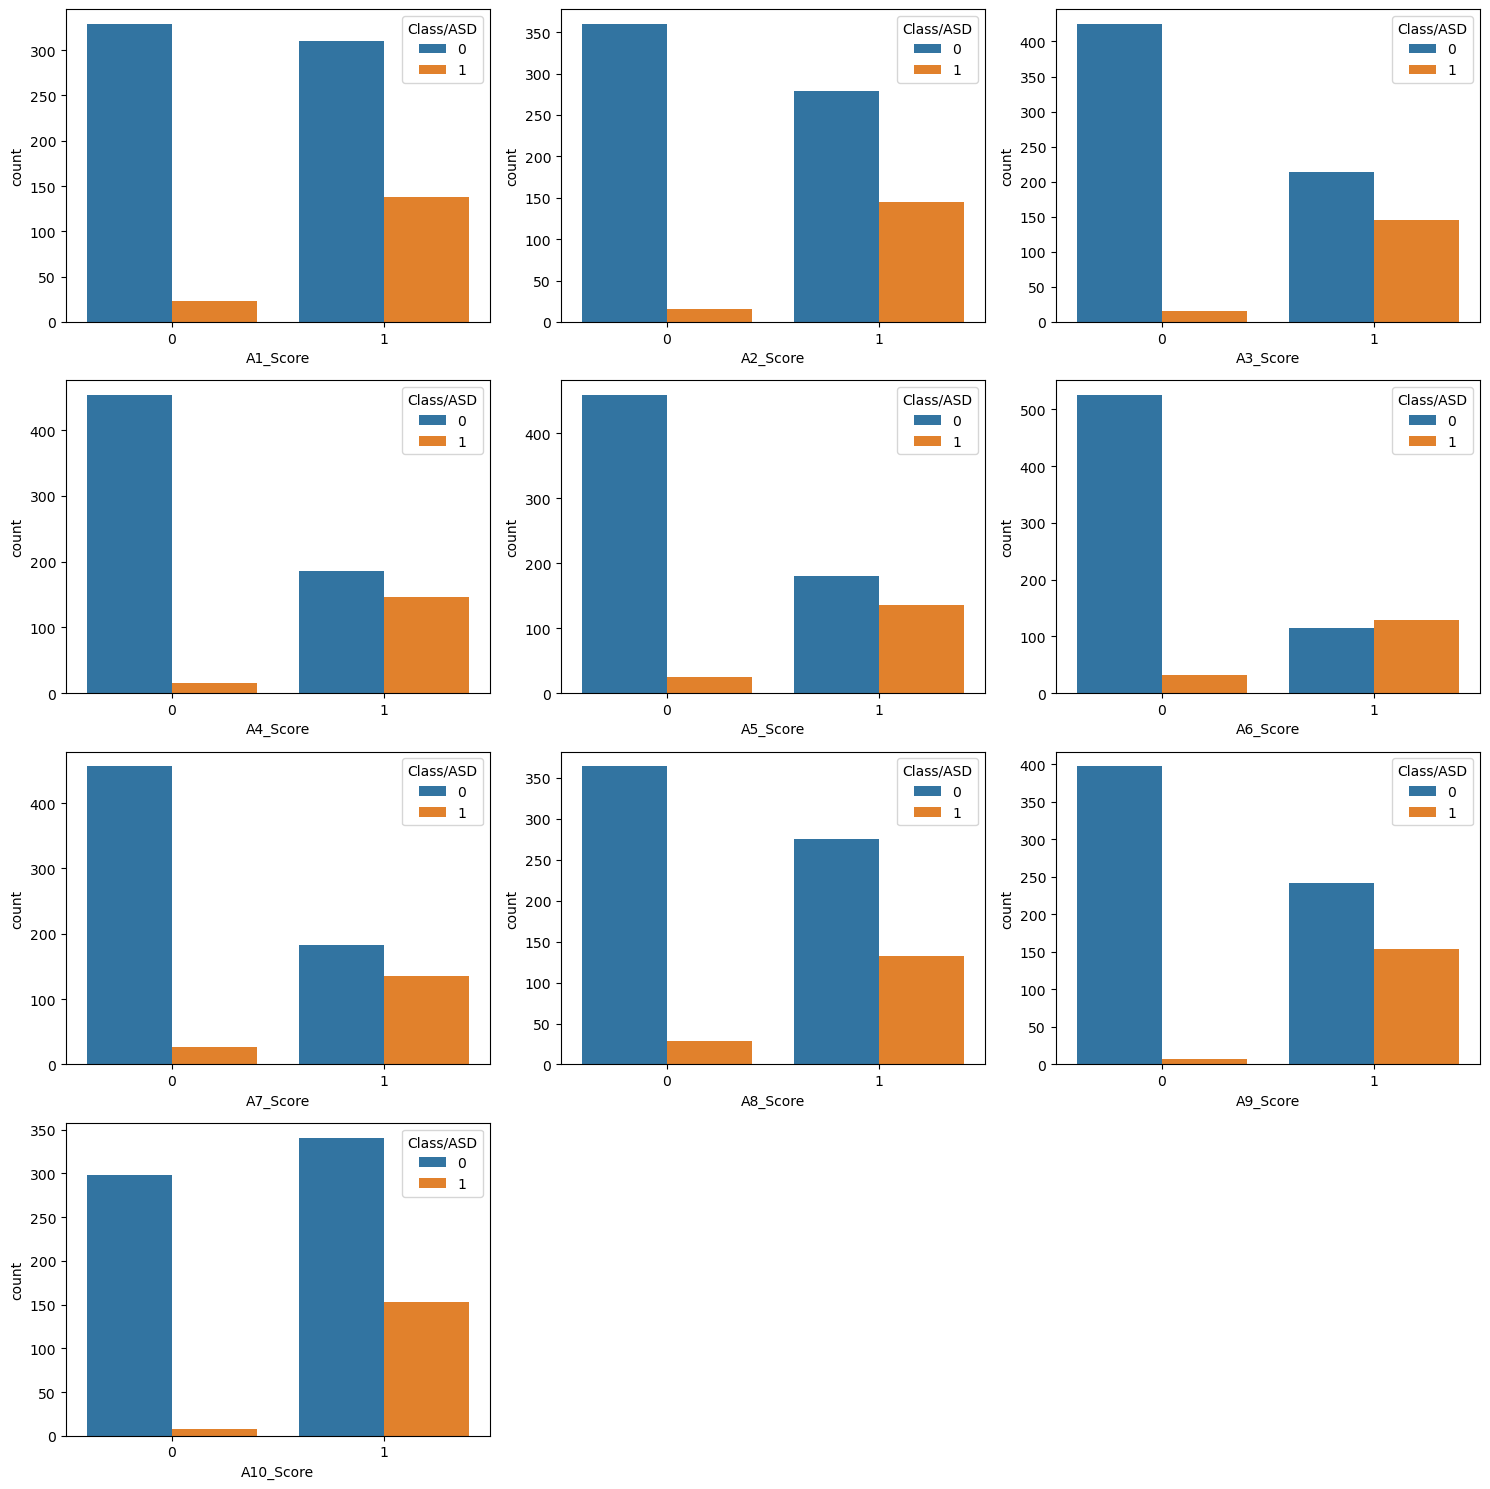

In [19]:
plt.subplots(figsize=(15,15))

for i, col in enumerate(ints):
    plt.subplot(4,3,i+1)
    sns.countplot(df[col], hue=df['Class/ASD'])
plt.tight_layout()
plt.show()

In [ ]:
#From the plots above, we can conclude that if the score is 0 then the chances of that person not having autism is quite highexcept in the case of A10_Score

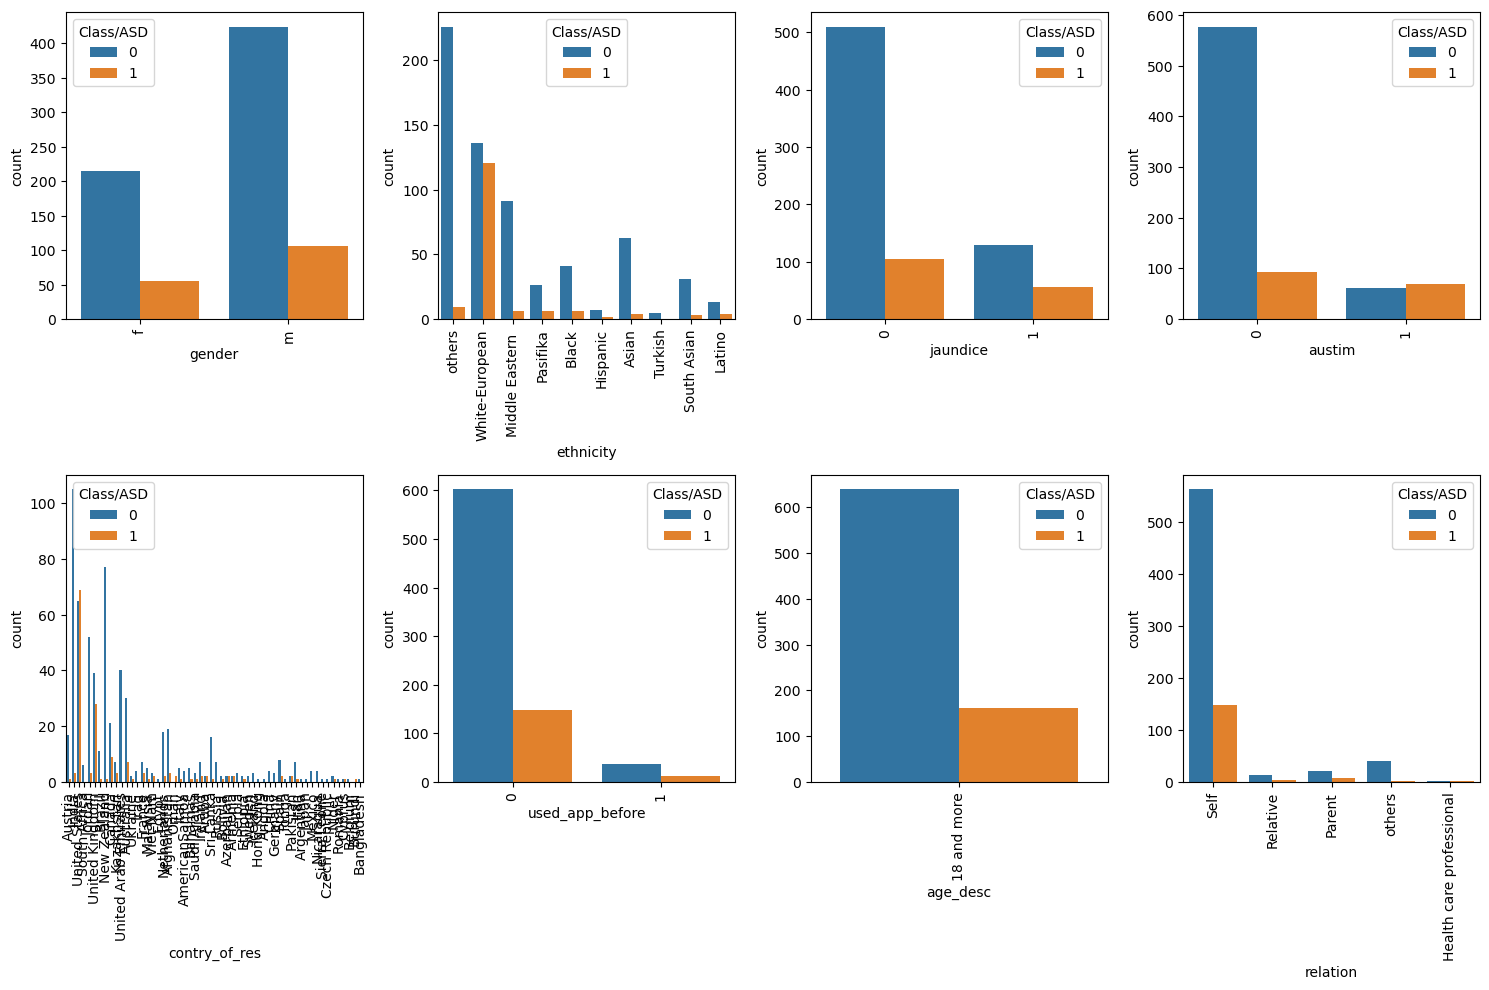

In [20]:
plt.subplots(figsize=(15,10))

for i, col in enumerate(objects):
    plt.subplot(2,4, i+1)
    sns.countplot(df[col], hue = df['Class/ASD'])
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#From the above plots we get to know that:

#- 'age_desc' is the same for all the data points.
#- 'used_app_before' feature doesn’t seem to be useful 
#- it looks like the chances of a male having autism is higher than a female, but that cannot be confirmed as we don’t have an     equal number of examples for males and females

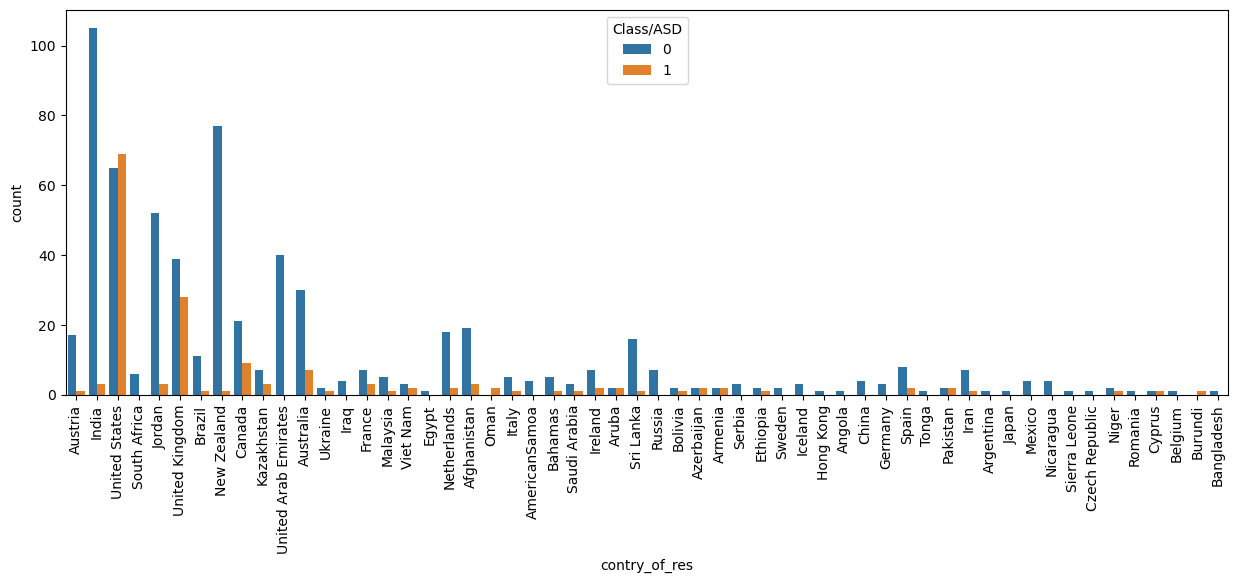

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(df['contry_of_res'], hue= df['Class/ASD'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Approximately 50% of the data available for some countries have autism and in some places, this is quite low. 
#This implies that geography also indicates the possibility for autism

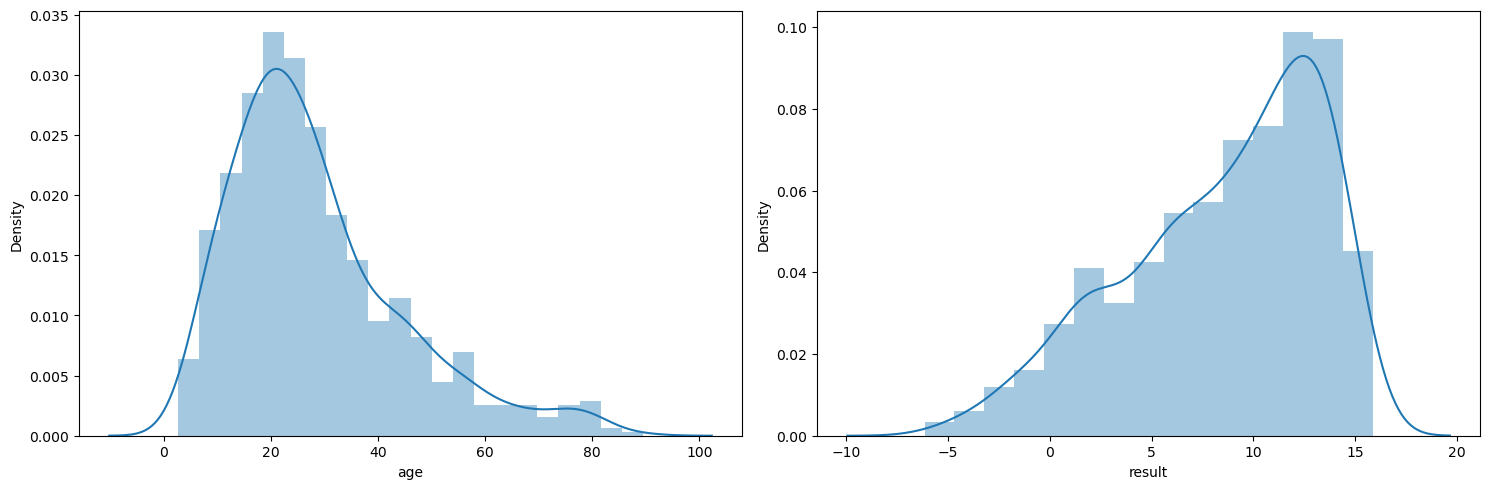

In [22]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
    plt.subplot(1,2,i+1)
    sns.distplot(df[col]) 
plt.tight_layout()
plt.show()

In [ ]:
#Both the continuous data are skewed, 'age' is positively skewed and 'result' is negatively skewed

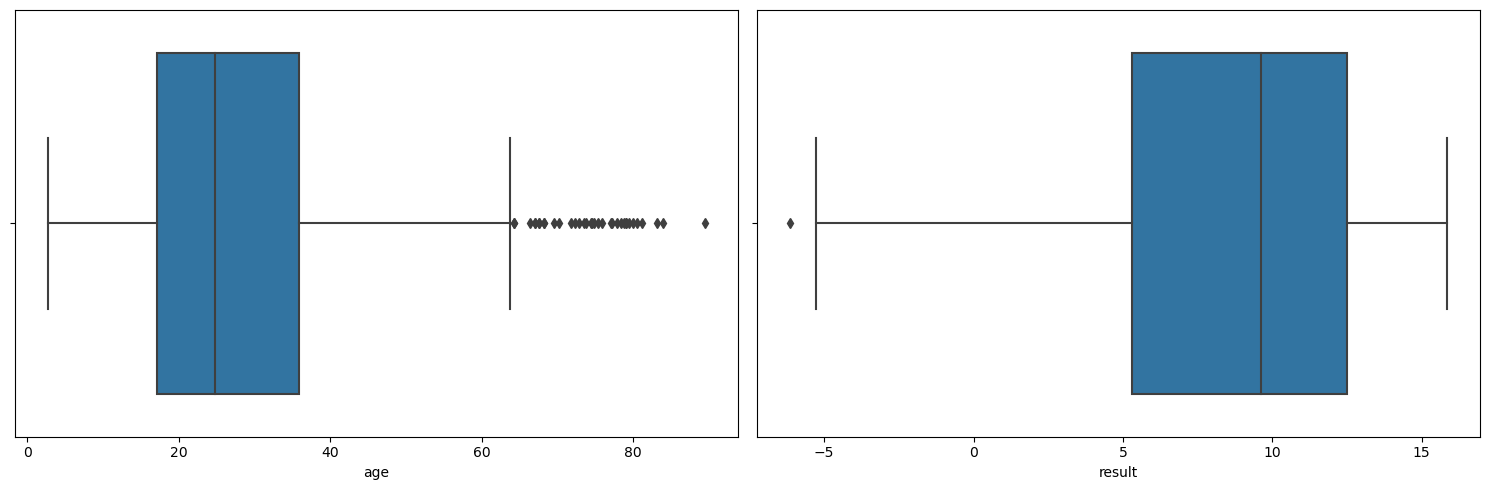

In [23]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col]) 
plt.tight_layout()
plt.show()

In [ ]:
#As per the boxplot above, there are some outliers.

In [24]:
#remove outliers from 'result' column
df = df[df['result'] > - 5]

In [25]:
df.shape

(798, 22)

In [26]:
#Feature Engineering

In [27]:
#making groups w.r.t 'age'
def convertAge(age):
    if age <  4:
        return 'Toddler'
    elif age < 12:
        return 'Kid'
    elif age < 18:
        return 'Teenager'
    elif age < 40:
        return 'Adult'
    else:
        return 'Senior'

In [28]:
df['ageGroup'] = df['age'].apply(convertAge)

In [29]:
df['ageGroup'].value_counts()

Adult       412
Senior      163
Teenager    120
Kid         100
Toddler       3
Name: ageGroup, dtype: int64

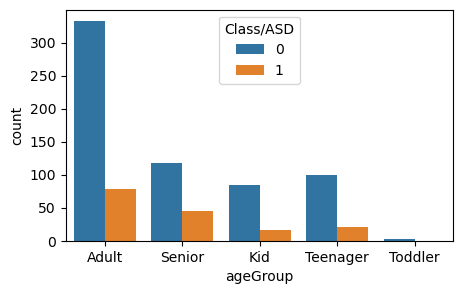

In [30]:
plt.figure(figsize=(5,3))
sns.countplot(df['ageGroup'], hue= df['Class/ASD'])
plt.show()

In [ ]:
#From the above plot, we can conclude that the Adult and Toddler group of people have lower chances of having Autism

In [31]:
#summing up the clinical scores from A1 to A10
def add_features(data):
    data["sum_Score"] = 0
    for col in data.loc[:,'A1_Score':'A10_Score'].columns:
        data['sum_Score'] = data['sum_Score'] + data[col]
    data['ind'] = data['austim'] + data['used_app_before'] + data['jaundice']
    return data

In [32]:
df = add_features(df)

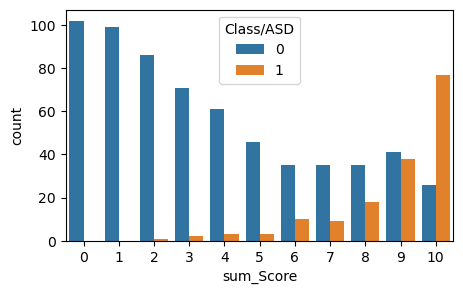

In [33]:
plt.figure(figsize=(5,3))
sns.countplot(df['sum_Score'], hue = df['Class/ASD'])
plt.show()

In [ ]:
#From the plot above, higher the sum score higher are the chances of having autism 
#For sum score less than 5 it is rare that the person has autism

In [34]:
# Applying log transformations to remove the skewness of 'age'
#Log transformations are commonly used to mitigate the effect of skewness, especially when dealing with data that is positively skewed 
df['age'] = df['age'].apply(lambda x: np.log(x))

<AxesSubplot:xlabel='age', ylabel='Density'>

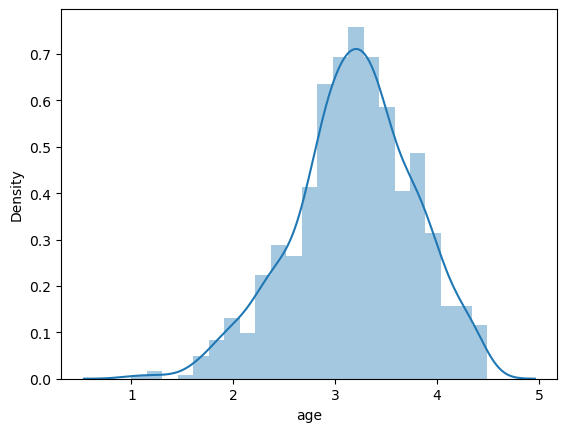

In [35]:
sns.distplot(df['age'])

In [36]:
#Label Encoding 
le = LabelEncoder()

In [37]:
def encode_labels(data):
    for col in data.columns:
        if data[col].dtype == object:
            data[col] = le.fit_transform(data[col]) 
    return data

In [38]:
df = encode_labels(df)

In [39]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,ageGroup,sum_Score,ind
0,1,1,0,1,0,1,0,1,0,1,...,0,7,0,6.351166,0,3,0,0,6,0
1,2,0,0,0,0,0,0,0,0,0,...,0,25,0,2.255185,0,3,0,2,0,0
2,3,1,1,1,1,1,1,1,1,1,...,1,54,0,14.851484,0,3,1,1,10,4
3,4,0,0,0,0,0,0,0,0,0,...,0,54,0,2.276617,0,3,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,46,0,-4.777286,0,3,0,2,0,0


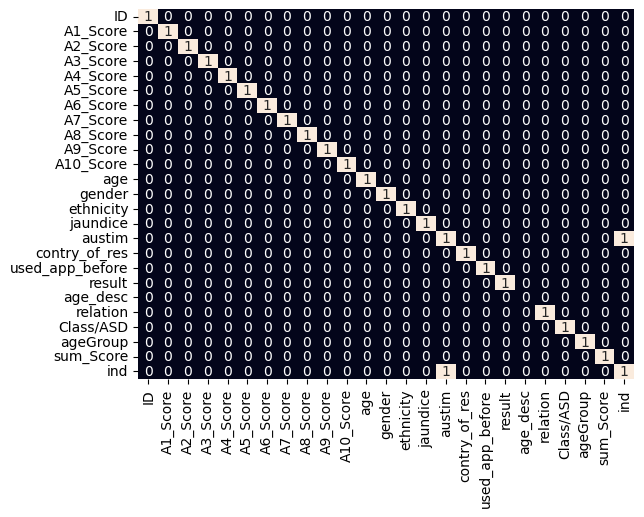

In [40]:
# Making a heatmap to visualize the correlation matrix
sns.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [41]:
# Model Training

In [42]:
# we will remove highly correlated features before training the model, as highly correlated features do not help in 
# learning useful patterns in the data.

X = df.drop(['ID', 'age_desc', 'used_app_before', 'austim', 'Class/ASD'], axis=1)

In [43]:
Y = df['Class/ASD']

In [44]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=10)

In [45]:
# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class(Random Over Sampler)
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy = 'minority', random_state =0)
X, Y = ros.fit_resample(X_train, Y_train)

In [46]:
X.shape, Y.shape

((1026, 20), (1026,))

In [47]:
#Normalizing 
sc = StandardScaler()

X = sc.fit_transform(X)
X_test = sc.transform(X_test)

In [48]:
#Logistic Regression
lr = LogisticRegression()

In [49]:
lr.fit(X,Y)

LogisticRegression()

In [50]:
print("Training Accuracy:", roc_auc_score(Y, lr.predict(X)))
print('Testing Accuracy:', roc_auc_score(Y_test, lr.predict(X_test)))

Training Accuracy: 0.8684210526315789
Testing Accuracy: 0.7701612903225806


In [51]:
#XGB Classifier
xgb = XGBClassifier()

In [52]:
xgb.fit(X,Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
print("Training Accuracy:", roc_auc_score(Y, xgb.predict(X)))
print('Testing Accuracy:', roc_auc_score(Y_test, xgb.predict(X_test)))

Training Accuracy: 1.0
Testing Accuracy: 0.7092293906810037


In [54]:
#Support Vector Classifier
svc = SVC()

In [55]:
svc.fit(X,Y)

SVC()

In [56]:
print("Training Accuracy:", roc_auc_score(Y, svc.predict(X)))
print('Testing Accuracy:', roc_auc_score(Y_test, svc.predict(X_test)))

Training Accuracy: 0.9444444444444444
Testing Accuracy: 0.8301971326164875


In [57]:
# Model Evaluation

In [ ]:
#As per the accuracies, Logistic Regression and SVC() classifier perform better on the validation data with less difference between the validation and training data

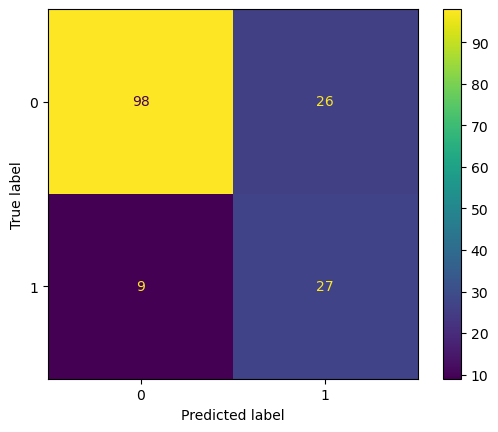

In [58]:
#confusion matrix for logistic regression mode
metrics.plot_confusion_matrix(lr, X_test, Y_test)

In [ ]:
#Conclusion:
#The machine learning model we have created is above 70-80% accurate. These machine learning models are able to predict whether the person has Autism or not. With the help of machine learning many such real-world problems can be solved.